In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

## Loading Dataset & Info

In [2]:
house_df = pd.read_excel("/kaggle/input/daftar-harga-rumah/DATA RUMAH.xlsx")
house_df

NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  KT  KM  GRS  
0     220  220   3   3    0  
1     180  137   4   3    2  
2     267  250   4   4    4  
3      40   25   2   2    0  
4     400  355   6   5    3  
...   ...  ...  ..  ..  ...  
1005  450  550  10  10    3  
1006  160  140   4   3    2  
1007  139  230   4   4    1  
1008  360  606   7   4    0  
1009  420  430   7   4    2  

[1010 rows x 8 columns]

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [4]:
house_df.describe()

NO         HARGA           LB           LT           KT  \
count  1010.000000  1.010000e+03  1010.000000  1010.000000  1010.000000   
mean    505.500000  7.628987e+09   276.539604   237.432673     4.668317   
std     291.706188  7.340946e+09   177.864557   179.957604     1.572776   
min       1.000000  4.300000e+08    40.000000    25.000000     2.000000   
25%     253.250000  3.262500e+09   150.000000   130.000000     4.000000   
50%     505.500000  5.000000e+09   216.500000   165.000000     4.000000   
75%     757.750000  9.000000e+09   350.000000   290.000000     5.000000   
max    1010.000000  6.500000e+10  1126.000000  1400.000000    10.000000   

                KM          GRS  
count  1010.000000  1010.000000  
mean      3.607921     1.920792  
std       1.420066     1.510998  
min       1.000000     0.000000  
25%       3.000000     1.000000  
50%       3.000000     2.000000  
75%       4.000000     2.000000  
max      10.000000    10.000000

## EDA

In [5]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [6]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [7]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [8]:
check_null(house_df)

Tidak ditemukan missing value pada dataset


### Drop feature tidak dibutuhkan seperti NO

In [9]:
house_df = house_df.drop(['NO'], axis=1)

In [10]:
numerical_feature = ['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']
non_numerical_feature = ['NAMA RUMAH']

In [11]:
check_outlier(house_df[numerical_feature])

Outlier pada tiap atribut:
HARGA     94
LB        53
LT        88
KT       153
KM       117
GRS      129
dtype: int64


HARGA     LB     LT     KT     KM    GRS
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False   True
3     False  False  False   True  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
1005  False  False   True   True   True  False
1006  False  False  False  False  False  False
1007  False  False  False  False  False  False
1008   True  False   True   True  False  False
1009  False  False  False   True  False  False

[1010 rows x 6 columns]

In [12]:
# #menghilangkan outlier
# Q1 = house_df[numerical_feature].quantile(0.25)
# Q3 = house_df[numerical_feature].quantile(0.75)
# IQR=Q3-Q1
# house_df=house_df[~((house_df[numerical_feature]<(Q1-1.5*IQR))|(house_df[numerical_feature]>(Q3+1.5*IQR))).any(axis=1)]
 
# # Cek ukuran dataset setelah kita drop outliers
# house_df.shape

                                                    jumlah sampel  persentase
NAMA RUMAH                                                                   
4 Bedrooms House Tebet, Jakarta Selatan, DKI Ja...             15         1.5
5 Bedrooms House Tebet, Jakarta Selatan, DKI Ja...              8         0.8
3 Bedrooms House Tebet, Jakarta Selatan, DKI Ja...              8         0.8
Rumah Tebet Barat                                               4         0.4
Rumah Dijual Di Tebet                                           4         0.4
...                                                           ...         ...
Rumah Dalam Komplek Di Gudang Peluru - Tebet Bl...              1         0.1
Tebet, Siap Huni, jalan 2 mobil                                 1         0.1
Rumah 2 Lantai Lokasi Strategis Akses 2 Mbl Ase...              1         0.1
Rumah Lama Layak Huni Akses 2 Mbl Lapangan Ros ...              1         0.1
Dijual Rumah Tebet Hitung Tanah Lokasi Strategi...              

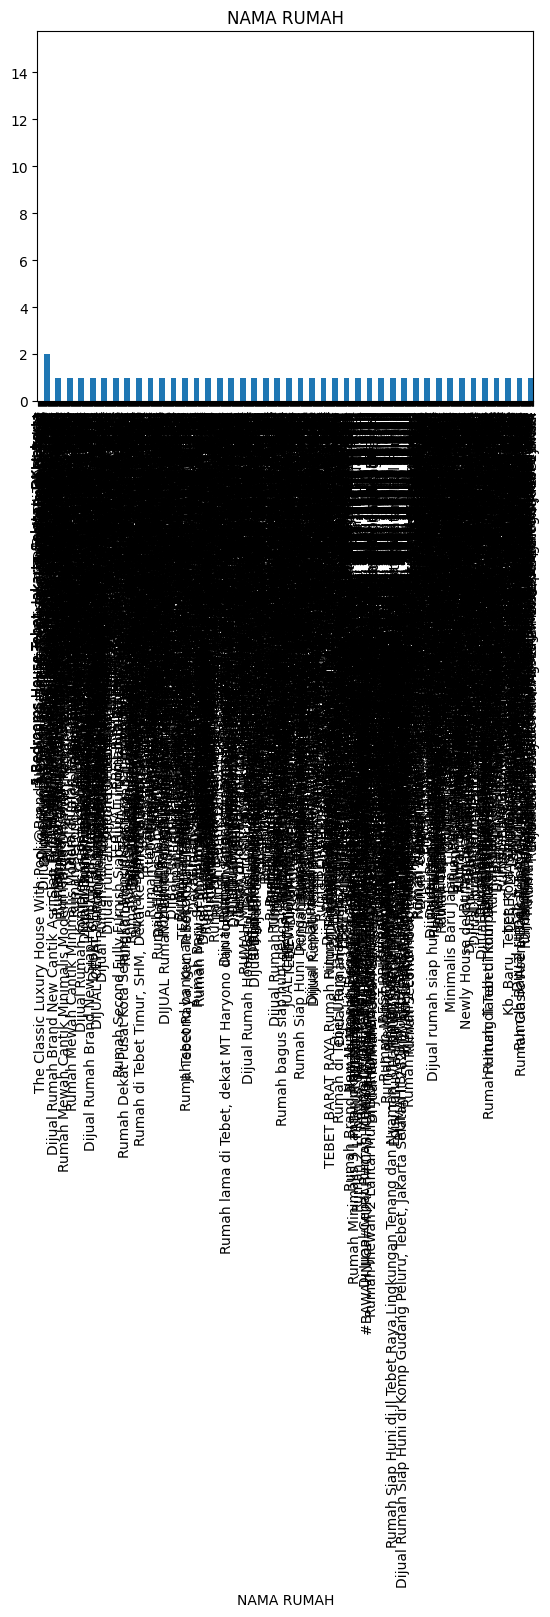

In [13]:
feature = non_numerical_feature[0]
count = house_df[feature].value_counts()
percent = 100*house_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Dikarenakan terlalu unik untuk fitur nama maka lebih baik di drop

In [14]:
house_df = house_df.drop(['NAMA RUMAH'], axis=1)

### Univariate Data Analysis

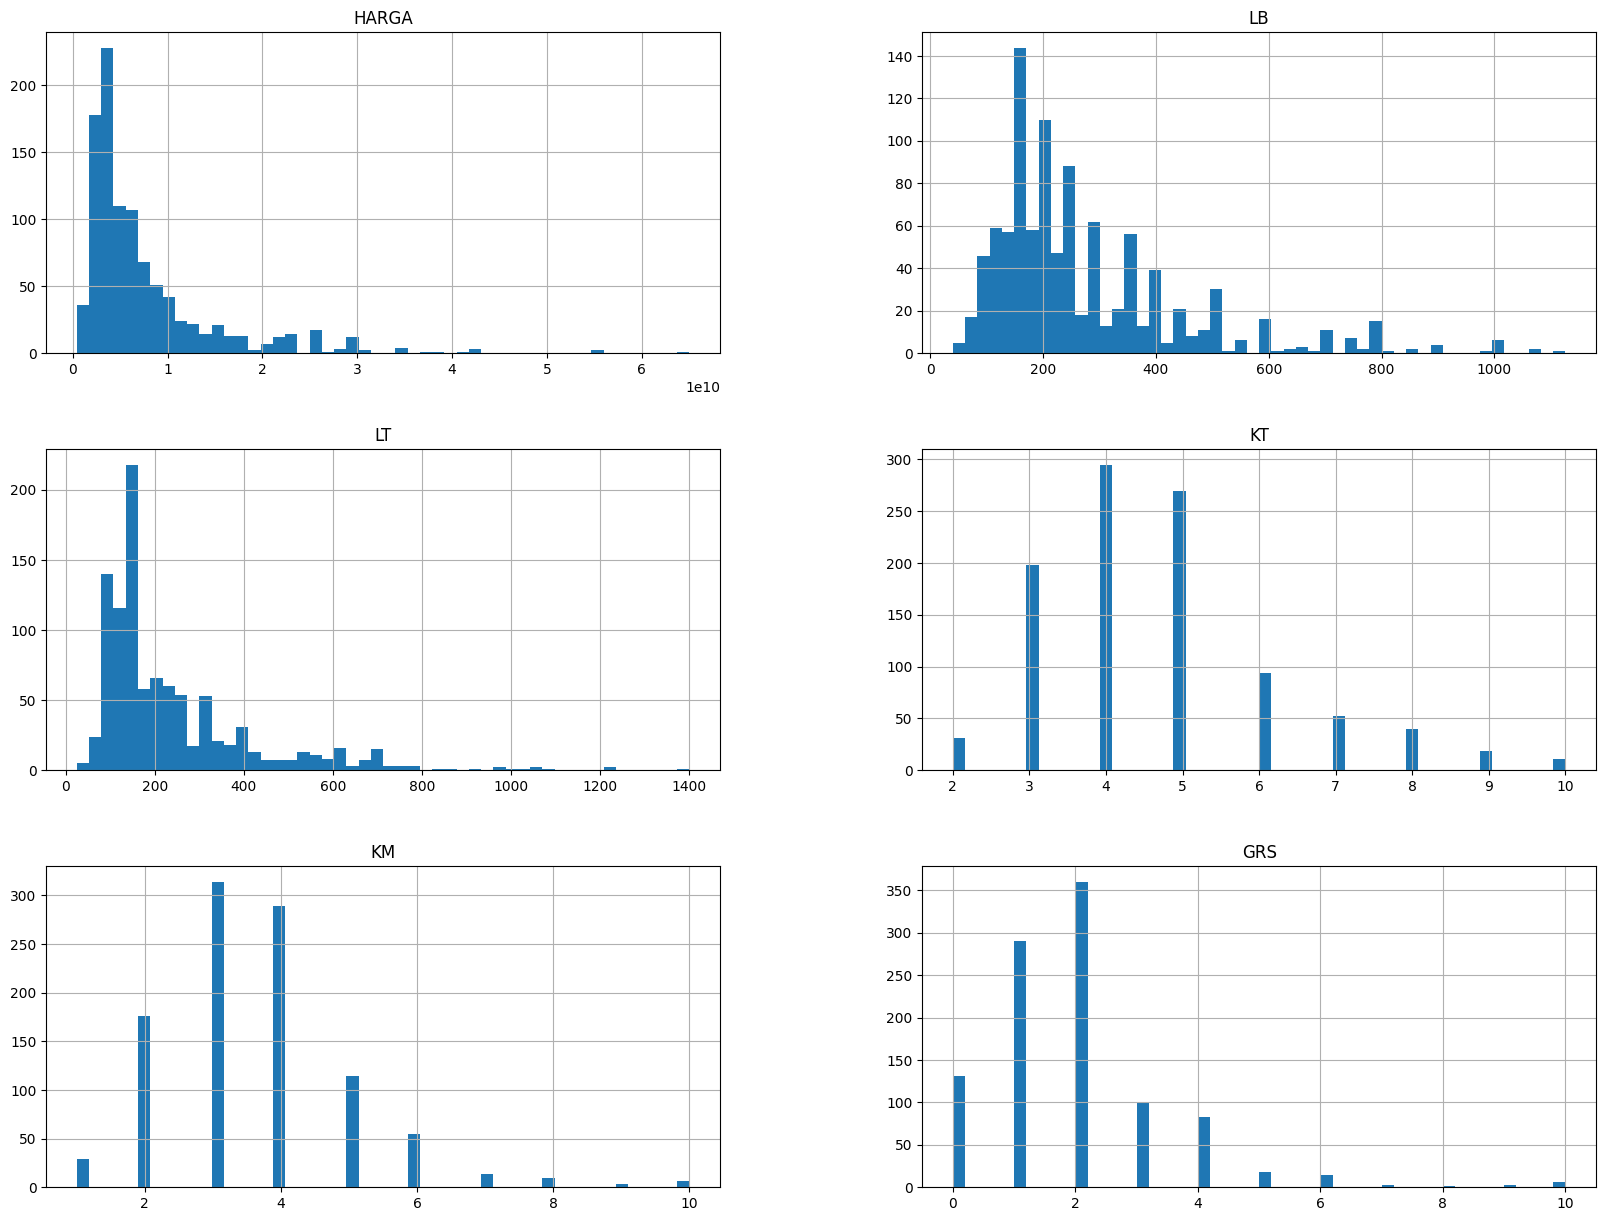

In [15]:
house_df[numerical_feature].hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

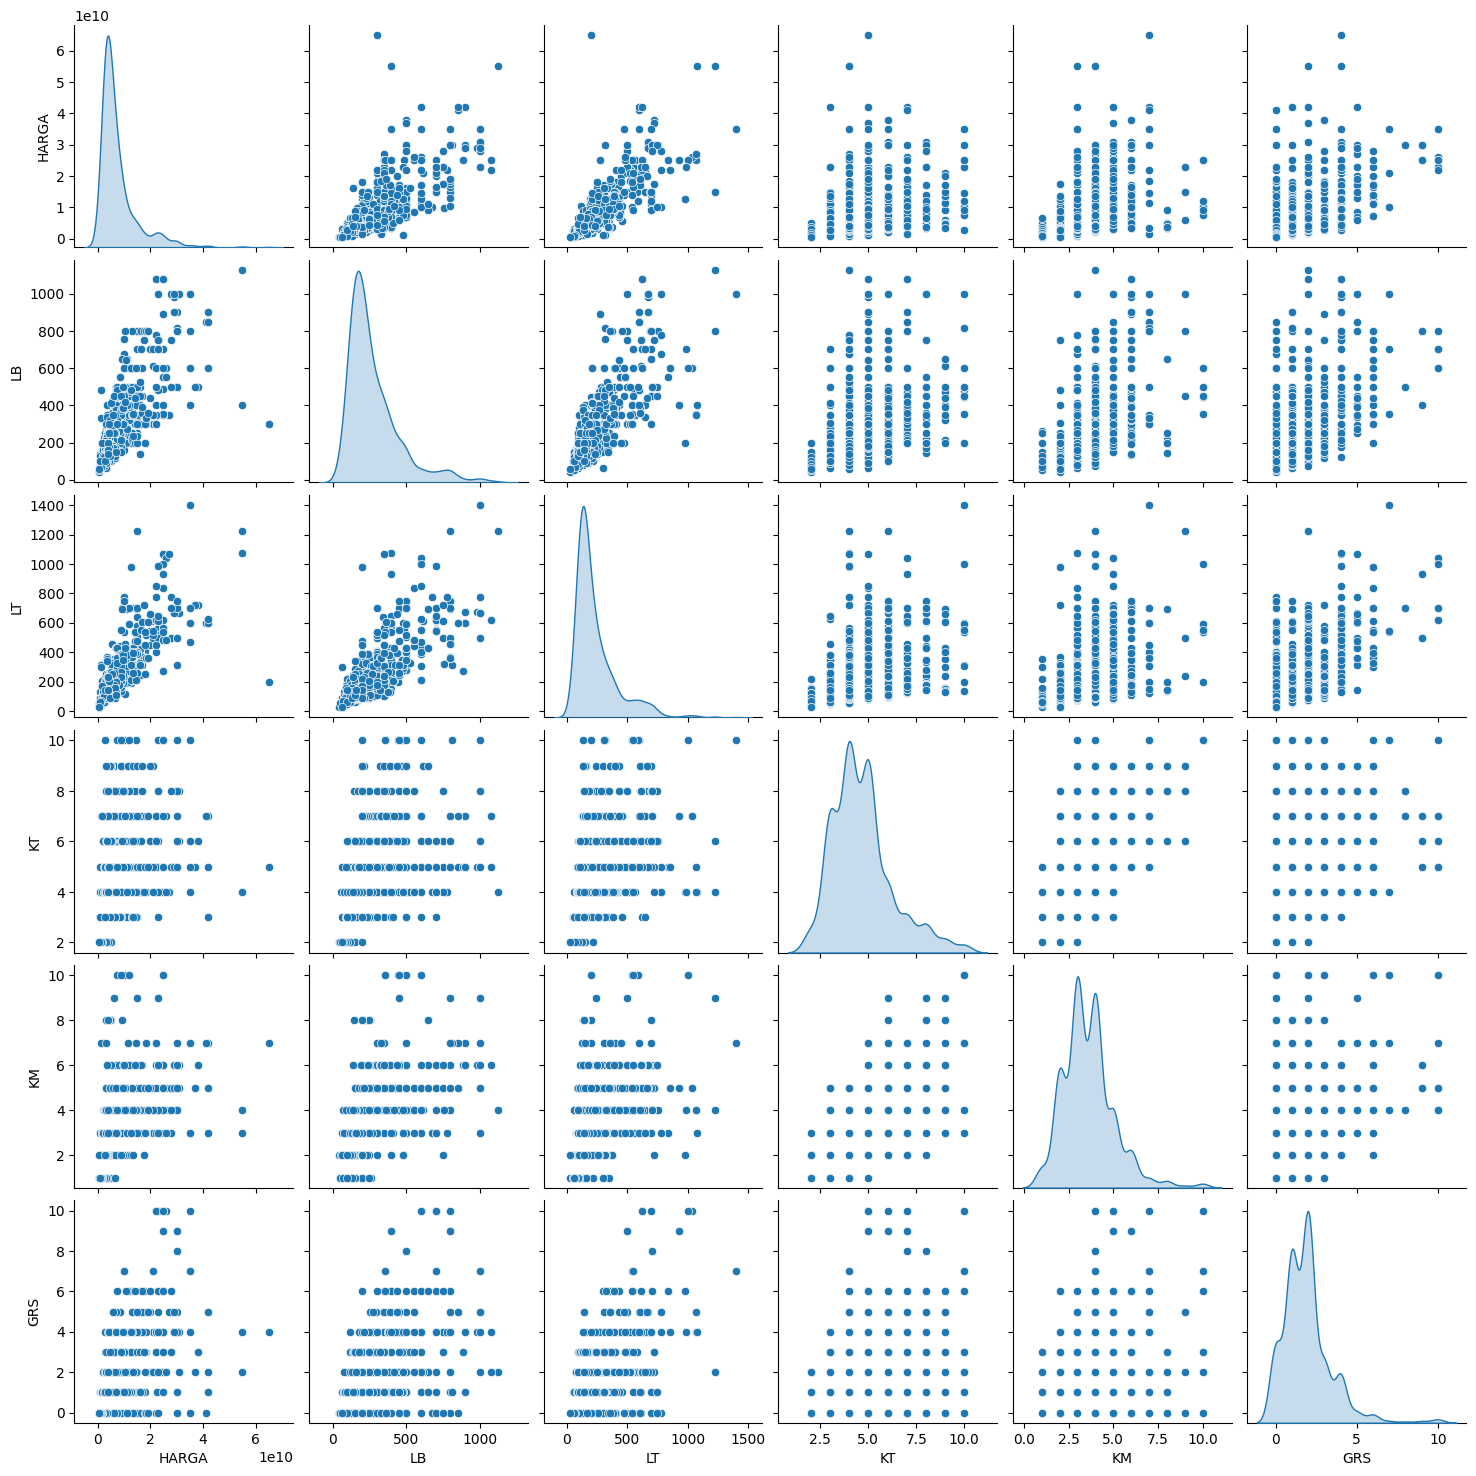

In [16]:
sns.pairplot(house_df[numerical_feature], diag_kind = 'kde')

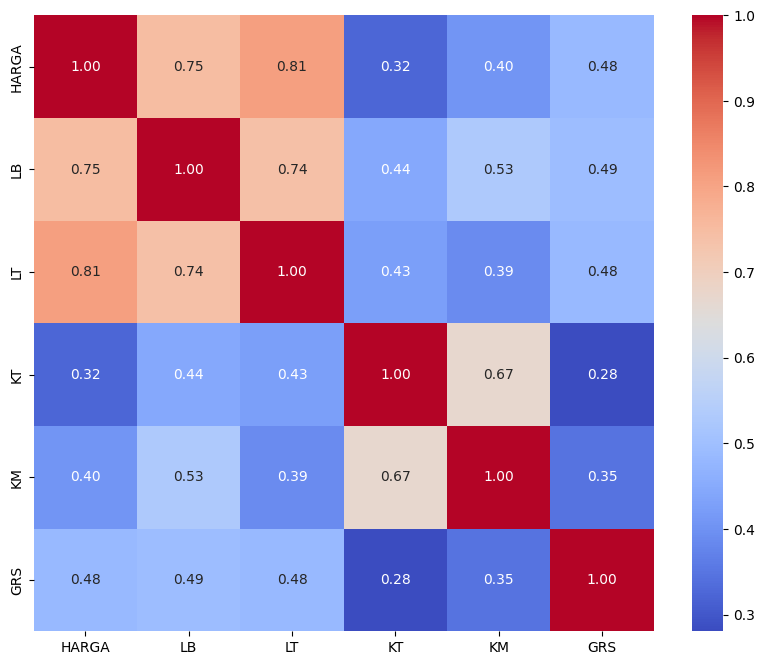

In [17]:
correlation_matrix = house_df[numerical_feature].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Split Training

In [18]:
from sklearn.model_selection import train_test_split
 
X = house_df.drop(["HARGA"],axis =1)
y = house_df["HARGA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'Linear Regression'])

## Model

### KNN

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [22]:
#knn
from sklearn.neighbors import KNeighborsRegressor
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
model_knn = KNeighborsRegressor()

# Define the hyperparameter grid
tuned_params = [{'n_neighbors': [5,6, 7, 8, 9, 10], 'metric': ['manhattan', 'euclidean', 'minkowski']}]

print("Tuning hyper-parameters for KNN Regression")
print()

# Assuming you have defined 'kfold'
clfKNN = GridSearchCV(
    model_knn,
    tuned_params,
    scoring='r2',
    cv=kfold,
    verbose=2
)

clfKNN.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for KNN Regression

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] END ....................metric=manhattan, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=7; total time=   0.0s
[CV]

In [23]:
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=clfKNN.predict(X_train_scaled), y_true=y_train)

### Random Forest

In [24]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor()

# Define the hyperparameter grid
tuned_params = [{
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}]

print("Tuning hyper-parameters for Random Forest Regression")
print()

# Assuming you have defined 'kfold'
clfRandomForest= GridSearchCV(
    model_forest,
    tuned_params,
    scoring='r2',
    cv=5,
    verbose=2
)

clfRandomForest.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfRandomForest.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for Random Forest Regression

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....bootstrap=True, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....bootstrap=True, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....bootstrap=True, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....bootstrap=True, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ....bootstrap=True, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...bootstrap=True, max_depth=None, n_estimators=200; total time= 

In [25]:
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=clfRandomForest.predict(X_train_scaled), y_true=y_train)

### Boosting 

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model_forest = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
tuned_params = [{
     'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0],
}]

print("Tuning hyper-parameters for Boosting Regressor")
print()

# Assuming you have defined 'kfold'
clfBoosting= GridSearchCV(
    model_forest,
    tuned_params,
    scoring='r2',
    cv=5,
    verbose=2
)

clfBoosting.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfBoosting.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfBoosting.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for Boosting Regressor

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_

In [27]:
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=clfBoosting.predict(X_train_scaled), y_true=y_train)

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print("Detailed regression report:")
y_true, y_pred = y_test, lin_reg.predict(X_test_scaled)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred=lin_reg.predict(X_train_scaled), y_true=y_train)

Detailed regression report:
MAE: 1980345761.1519244
MSE: 1.067572907405743e+19
RMSE: 3267373421.275479
R_squared: 0.7713134894077546


In [29]:
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred=lin_reg.predict(X_train_scaled), y_true=y_train)

## Evaluation

In [30]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'Linear Regression'])

model_dict = {'KNN': clfKNN, 'RF': clfRandomForest, 'Boosting': clfBoosting, 'Linear Regression' : lin_reg}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = r2_score(y_true=y_train, y_pred=model.predict(X_train_scaled))
    mse.loc[name, 'test'] = r2_score(y_true=y_test, y_pred=model.predict(X_test_scaled))

# Panggil mse
mse

train      test
KNN                0.762046  0.742446
RF                 0.958715  0.782716
Boosting           0.965696  0.799928
Linear Regression  0.704069  0.771313

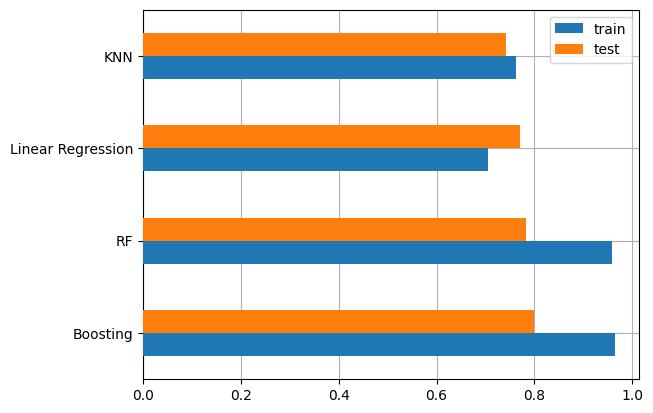

In [31]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)